In [1]:
from utils.helpers import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
np.random.seed(0)

### Macro Factor Model

In [3]:
df_factor_returns = pd.read_csv('data/factor_returns.csv', index_col=0)
df_universe_returns = pd.read_csv('data/universe_returns.csv', index_col=0)
df_factor_returns.index = pd.to_datetime(df_factor_returns.index)
df_universe_returns.index = pd.to_datetime(df_universe_returns.index)

<Axes: >

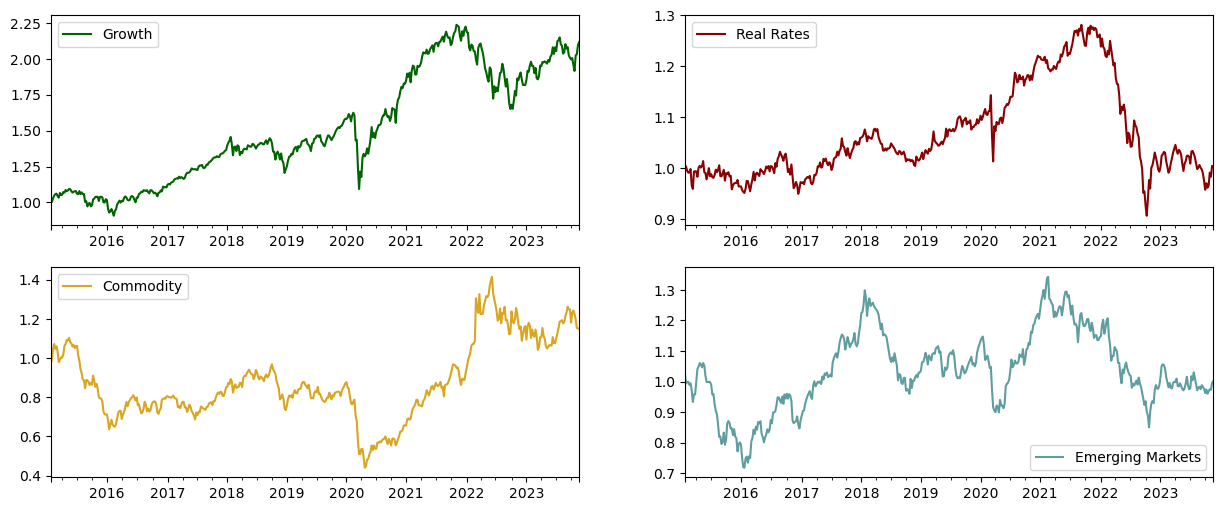

In [4]:
fig, ax = plt.subplots(2,2, figsize=(15,6))

(df_factor_returns['Growth']+1).cumprod().plot(ax=ax[0][0], color='darkgreen', legend=True, label='Growth')
(df_factor_returns['Real Rates']+1).cumprod().plot(ax=ax[0][1], color='darkred', legend=True, label='Real Rates')
(df_factor_returns['Commodity']+1).cumprod().plot(ax=ax[1][0], color='goldenrod', legend=True, label='Commodity')
(df_factor_returns['Emerging Markets']+1).cumprod().plot(ax=ax[1][1], color='cadetblue', legend=True, label='Emerging Markets')


In [5]:
df_universe_returns

,Bonds_US_10Y,Bonds_Canada_10Y,Bonds_Germany_10Y,Bonds_UK_10Y,Equity_US_Big,Equity_US_Small,Equity_EMU,Equity_EMU_Small,Equity_UK,Equity_Japan_Broad,Equity_EM,Commodity_WTI,Commodity_Gold,Commodity_Copper
2015-01-23,-0.001444,1.535522e-02,0.008194,0.006244,0.015400,0.010753,0.056839,0.042594,0.043150,0.019619,0.032181,-0.034592,0.009681,-0.033555
2015-01-30,0.009278,1.526239e-02,0.004158,0.011431,-0.027153,-0.019588,-0.010343,-0.003714,-0.009307,0.005169,-0.043045,-0.024570,-0.012719,-0.009219
2015-02-06,-0.016475,-1.208127e-02,-0.006086,-0.024542,0.032437,0.036083,0.014631,0.022367,0.013644,0.017714,0.021335,0.142737,-0.032504,0.040586
2015-02-13,-0.003763,4.863813e-04,0.003598,-0.002483,0.019727,0.014878,0.015597,0.018232,0.005664,0.013756,0.020477,0.026819,-0.000666,0.010084
2015-02-20,-0.006458,2.220446e-16,-0.001069,-0.007965,0.006449,0.005487,0.011591,0.008057,0.005998,0.026032,0.000101,-0.037388,-0.020397,-0.000942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-27,0.003980,1.014518e-02,0.004372,0.012094,-0.026068,-0.026453,-0.002720,-0.015326,-0.015218,-0.014488,-0.008128,-0.043843,-0.006701,0.022734
2023-11-03,0.018206,2.034632e-02,0.014691,0.026160,0.057580,0.074524,0.039425,0.066148,0.014154,0.069422,0.052885,-0.022927,0.005838,0.009352
2023-11-10,-0.008652,-9.588460e-03,-0.005516,-0.002413,0.012454,-0.031793,0.003817,-0.004313,-0.005933,0.004582,-0.003736,-0.054294,-0.026698,-0.023086
2023-11-17,0.012363,1.139479e-02,0.009398,0.022084,0.021894,0.053111,0.033270,0.036654,0.020347,0.019614,0.024896,-0.007523,0.022196,0.033116


In [6]:
df_betas = fit_factor_model(df_factor_returns, df_universe_returns)
d, m = df_betas.shape
if np.linalg.matrix_rank(df_betas)!=m:
    raise ValueError('The factor loadings matrix is NOT full rank!')    
df_betas

,Growth,Real Rates,Commodity,Emerging Markets
Bonds_US_10Y,-0.103495,0.464504,-0.039937,0.000000
Bonds_Canada_10Y,-0.072329,0.520977,-0.072325,-0.000000
Bonds_Germany_10Y,-0.053928,0.471268,-0.044955,-0.039461
Bonds_UK_10Y,-0.000000,0.654939,-0.067094,-0.071652
Equity_US_Big,1.079518,-0.108005,-0.000000,-0.133111
Equity_US_Small,1.304021,-0.185203,0.000000,-0.114716
Equity_EMU,1.024469,-0.428370,-0.000000,0.097138
Equity_EMU_Small,0.900677,-0.274123,-0.000000,0.098726
Equity_UK,0.735390,-0.331786,0.000000,0.095707
Equity_Japan_Broad,1.019798,-0.678376,0.000000,0.000000


### Risk Budgeting portfolios for Expected Shortfall

Beyond volatility, Asset-Factor Risk Budgeting portfolios can also be computed when risk is defined by Expected Shortfall. This approach requires only a sample of asset returns and the beta matrix.

$$  \min_{y \in \mathcal C^{> 0}, \zeta \in \mathbb R} \mathbb E_{X \sim data}\Big[ \zeta + \frac 1{1-\alpha} (-y'X-\zeta)_+ -  \lambda_a \sum_{i=1}^d {b_a}_i \log{y_i} - \lambda_f \sum_{i=1}^m {b_f}_i \log{(\beta'y)_i}\Big].  $$

where $\mathcal C^{>0} = \big\{y\in(\mathbb R_+^*)^d | (\beta'y)_i>0, \forall i \in \{1,\ldots,m\}\big\}$ and $\lambda_a, \lambda_f \in \mathbb R_+^*$ are asset and factor importance parameters. 

In [7]:
# assigned risk budgets and importance parameters
asset_budgets = np.array([.1,.1,.1,.1,.4/7,.4/7,.4/7,.4/7,.4/7,.4/7,.4/7, .2/3, .2/3, .2/3])
factor_budgets = np.array([.35, .35, .2, .1])
lambda_asset, lambda_factor = (.5,.5)
expected_shortfall_alpha = 0.95

# compute various portfolios
_, theta_rb_es = compute_expected_shortfall_risk_budgeting(df_universe_returns.values, asset_budgets, expected_shortfall_alpha)
_, theta_frb_es = compute_expected_shortfall_factor_risk_budgeting(df_universe_returns.values, df_betas.values, factor_budgets, expected_shortfall_alpha)
_, theta_frb_long_only = compute_expected_shortfall_factor_risk_budgeting(df_universe_returns.values, df_betas.values, factor_budgets, expected_shortfall_alpha, long_only=True)
_, theta_afrb_es = compute_expected_shortfall_asset_factor_risk_budgeting(df_universe_returns.values, df_betas.values, asset_budgets, factor_budgets, lambda_asset, lambda_factor, expected_shortfall_alpha)

In [8]:
# portfolio asset weights
pd.DataFrame({'Risk Budgeting': theta_rb_es, 'Factor Risk Budgeting': theta_frb_es, 'Factor Risk Budgeting (Long Only)': theta_frb_long_only, 'Asset Factor Risk Budgeting': theta_afrb_es}, index=df_universe_returns.columns).round(2)

,Risk Budgeting,Factor Risk Budgeting,Factor Risk Budgeting (Long Only),Asset Factor Risk Budgeting
Bonds_US_10Y,0.21,-0.06,0.00,0.20
Bonds_Canada_10Y,0.17,0.52,0.47,0.17
Bonds_Germany_10Y,0.15,-0.51,0.00,0.12
Bonds_UK_10Y,0.11,0.47,0.00,0.10
Equity_US_Big,0.03,0.26,0.11,0.03
Equity_US_Small,0.02,-0.06,0.01,0.02
Equity_EMU,0.03,0.06,0.00,0.03
Equity_EMU_Small,0.03,0.23,0.05,0.03
Equity_UK,0.03,-0.48,0.00,0.03
Equity_Japan_Broad,0.04,0.02,0.00,0.03


In [9]:
# portfolio factor exposures
pd.DataFrame({'Risk Budgeting': df_betas.values.T @ theta_rb_es, 'Factor Risk Budgeting': df_betas.values.T @ theta_frb_es, 'Factor Risk Budgeting (Long Only)': df_betas.values.T @ theta_frb_long_only, 'Asset Factor Risk Budgeting': df_betas.values.T @ theta_afrb_es}, index=df_betas.columns).round(2)

,Risk Budgeting,Factor Risk Budgeting,Factor Risk Budgeting (Long Only),Asset Factor Risk Budgeting
Growth,0.16,0.23,0.18,0.16
Real Rates,0.31,0.47,0.34,0.30
Commodity,0.02,0.13,0.09,0.06
Emerging Markets,0.04,0.13,0.08,0.06


In [10]:
# portfolio asset risk contributions (expected shortfall)
contrib_theta_rb = theta_rb_es*gradient_expected_shortfall(df_universe_returns.values, theta_rb_es, expected_shortfall_alpha)
contrib_theta_rb = contrib_theta_rb/sum(contrib_theta_rb)

contrib_theta_frb = theta_frb_es*gradient_expected_shortfall(df_universe_returns.values, theta_frb_es, expected_shortfall_alpha)
contrib_theta_frb = contrib_theta_frb/sum(contrib_theta_frb)

contrib_theta_frb_long_only = theta_frb_long_only*gradient_expected_shortfall(df_universe_returns.values, theta_frb_long_only, expected_shortfall_alpha)
contrib_theta_frb_long_only = contrib_theta_frb_long_only/sum(contrib_theta_frb_long_only)

contrib_theta_afrb = theta_afrb_es*gradient_expected_shortfall(df_universe_returns.values, theta_afrb_es, expected_shortfall_alpha)
contrib_theta_afrb = contrib_theta_afrb/sum(contrib_theta_afrb)

print('Asset Risk Contributions (Expected Shortfall)')
pd.DataFrame({'Risk Budgeting': contrib_theta_rb, 'Factor Risk Budgeting': contrib_theta_frb, 'Factor Risk Budgeting (Long Only)': contrib_theta_frb_long_only, 'Asset Factor Risk Budgeting': contrib_theta_afrb, 'Target Risk Budgets': asset_budgets}, index=df_universe_returns.columns).round(2)

Asset Risk Contributions (Expected Shortfall)


,Risk Budgeting,Factor Risk Budgeting,Factor Risk Budgeting (Long Only),Asset Factor Risk Budgeting,Target Risk Budgets
Bonds_US_10Y,0.10,-0.01,0.00,0.07,0.10
Bonds_Canada_10Y,0.10,0.06,0.09,0.07,0.10
Bonds_Germany_10Y,0.10,-0.06,0.00,0.06,0.10
Bonds_UK_10Y,0.10,0.14,0.00,0.08,0.10
Equity_US_Big,0.06,0.35,0.22,0.06,0.06
Equity_US_Small,0.06,-0.10,0.03,0.06,0.06
Equity_EMU,0.06,0.07,0.00,0.06,0.06
Equity_EMU_Small,0.06,0.28,0.09,0.06,0.06
Equity_UK,0.06,-0.40,0.00,0.05,0.06
Equity_Japan_Broad,0.06,0.02,0.00,0.05,0.06


In [11]:
# portfolio factor risk contributions (expected shortfall)

factor_contrib_theta_rb = factor_expected_shortfall_contribution(df_betas.values.T@theta_rb_es, df_universe_returns.values, df_betas.values, expected_shortfall_alpha)
factor_contrib_theta_rb = factor_contrib_theta_rb/sum(factor_contrib_theta_rb)

factor_contrib_theta_frb = factor_expected_shortfall_contribution(df_betas.values.T@theta_frb_es, df_universe_returns.values, df_betas.values, expected_shortfall_alpha)
factor_contrib_theta_frb = factor_contrib_theta_frb/sum(factor_contrib_theta_frb)

factor_contrib_theta_frb_long_only = factor_expected_shortfall_contribution(df_betas.values.T@theta_frb_long_only, df_universe_returns.values, df_betas.values, expected_shortfall_alpha)
factor_contrib_theta_frb_long_only = factor_contrib_theta_frb_long_only/sum(factor_contrib_theta_frb_long_only)

factor_contrib_theta_afrb = factor_expected_shortfall_contribution(df_betas.values.T@theta_afrb_es, df_universe_returns.values, df_betas.values, expected_shortfall_alpha)
factor_contrib_theta_afrb = factor_contrib_theta_afrb/sum(factor_contrib_theta_afrb)

print('Factor Risk Contributions (Expected Shortfall)')
pd.DataFrame({'Risk Budgeting': factor_contrib_theta_rb, 'Factor Risk Budgeting': factor_contrib_theta_frb, 'Factor Risk Budgeting (Long Only)': factor_contrib_theta_frb_long_only, 'Asset Factor Risk Budgeting': factor_contrib_theta_afrb, 'Target Factor Risk Budgets': factor_budgets}, index=df_betas.columns).round(2)

Factor Risk Contributions (Expected Shortfall)


,Risk Budgeting,Factor Risk Budgeting,Factor Risk Budgeting (Long Only),Asset Factor Risk Budgeting,Target Factor Risk Budgets
Growth,0.43,0.34,0.35,0.39,0.35
Real Rates,0.46,0.33,0.38,0.43,0.35
Commodity,0.06,0.22,0.19,0.12,0.20
Emerging Markets,0.05,0.11,0.08,0.06,0.10
